# Simple Linear Regression Analysis

In [ ]:
!pip install scikit-learn
!pip install statsmodels

In [2]:
# Load mtcars data set
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
plt.style.use('ggplot')

In [2]:
# reading a data file
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
print(mtcars.head())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


In [3]:
# check for data types
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

C:\Users\excel\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


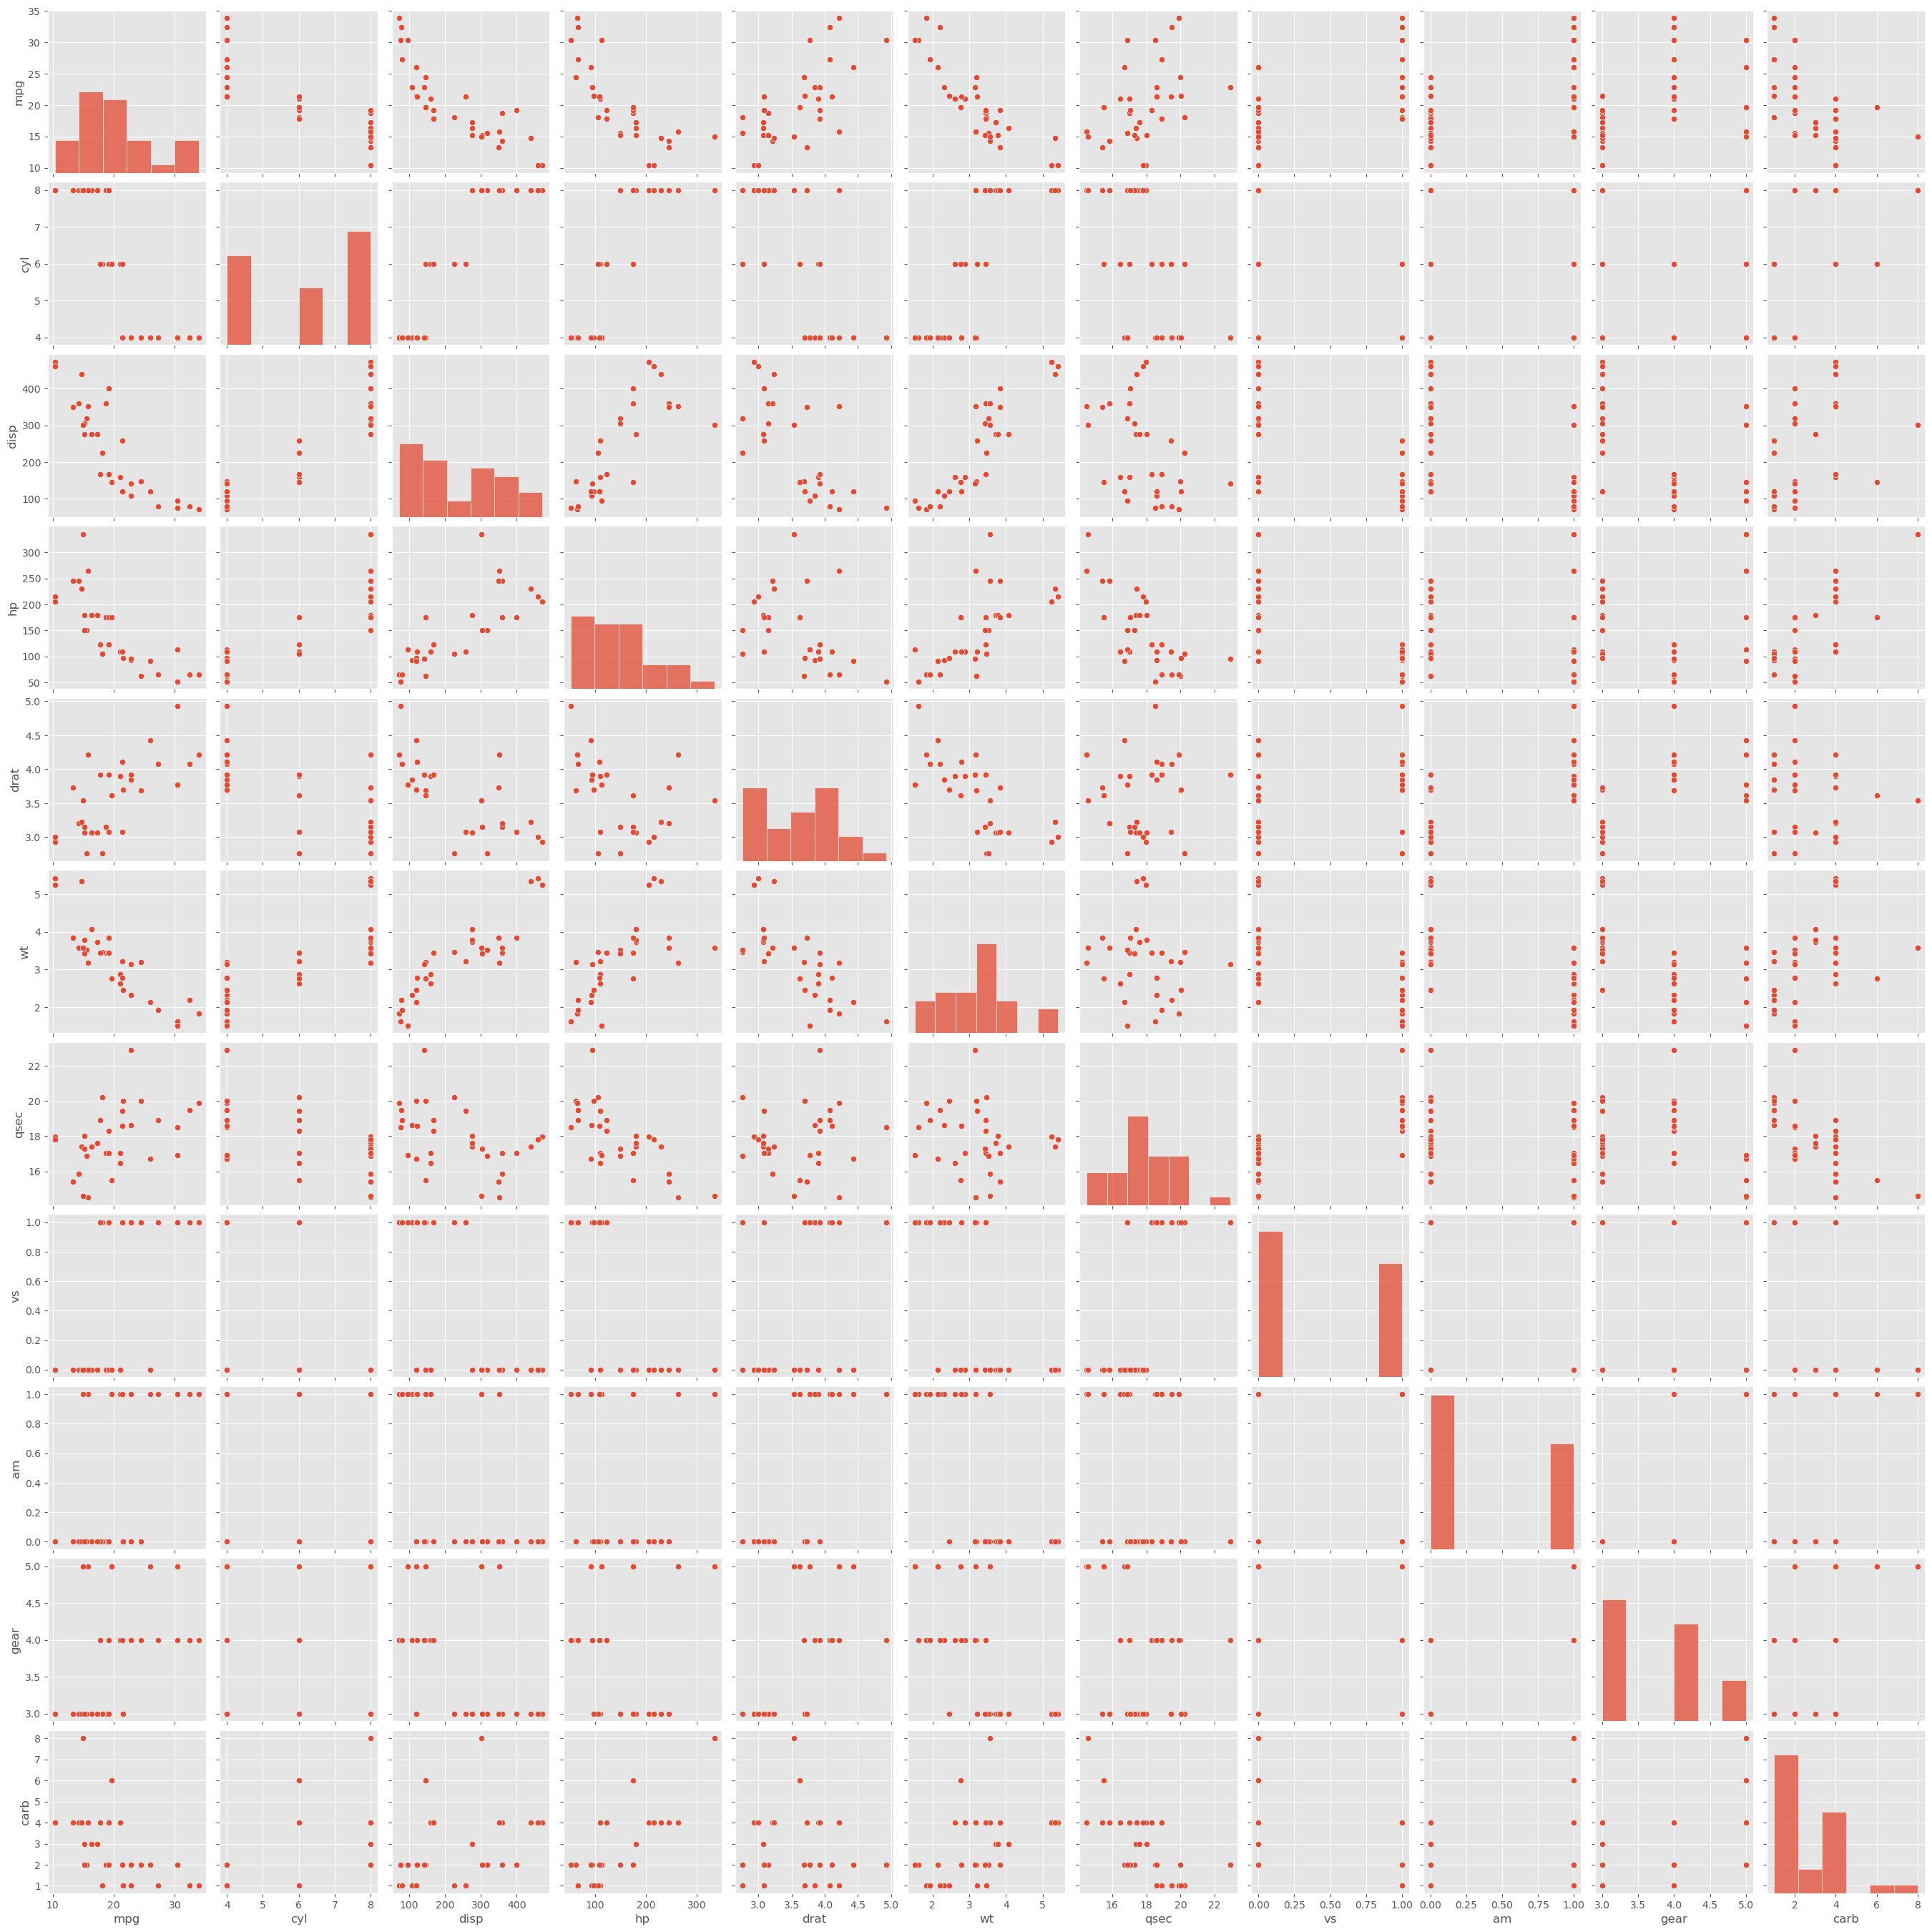

In [4]:
# checking relation between the pair for variables
import seaborn as sns
sns.pairplot(mtcars) # matrix plotting

In [29]:
# correlation for mpg vs wt
mtcars['mpg'].corr(mtcars['wt'])

-0.8676593765172281

<Axes: xlabel='wt', ylabel='mpg'>

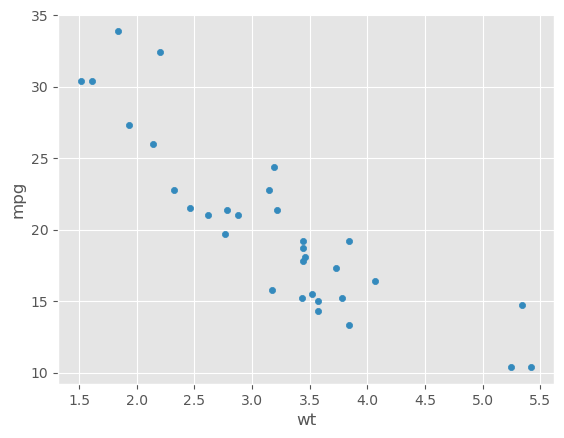

In [6]:
# relation between the weight and mileage
mtcars.plot(kind = 'scatter',x = 'wt',y='mpg')

In [7]:
# summary statistics for two variables.
mtcars[["mpg","wt"]].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


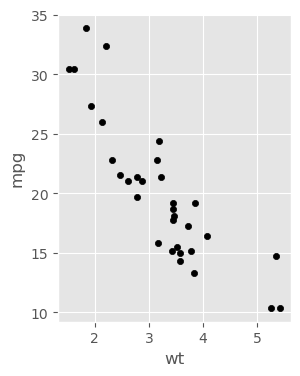

In [8]:
mtcars.plot(kind="scatter",x="wt",y="mpg",figsize = (3,4),color="black");

# Model fitting

In [9]:
y = mtcars['mpg']
x = mtcars['wt']
x = sm.add_constant(x) # statsmodel library
print(x)

    const     wt
0     1.0  2.620
1     1.0  2.875
2     1.0  2.320
3     1.0  3.215
4     1.0  3.440
5     1.0  3.460
6     1.0  3.570
7     1.0  3.190
8     1.0  3.150
9     1.0  3.440
10    1.0  3.440
11    1.0  4.070
12    1.0  3.730
13    1.0  3.780
14    1.0  5.250
15    1.0  5.424
16    1.0  5.345
17    1.0  2.200
18    1.0  1.615
19    1.0  1.835
20    1.0  2.465
21    1.0  3.520
22    1.0  3.435
23    1.0  3.840
24    1.0  3.845
25    1.0  1.935
26    1.0  2.140
27    1.0  1.513
28    1.0  3.170
29    1.0  2.770
30    1.0  3.570
31    1.0  2.780


In [10]:
y.shape, x.shape

((32,), (32, 2))

In [11]:
# Linear regression using statsmodel OLS: ordinary least square method
model_sm = sm.OLS(y,x).fit()
print(model_sm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.745   
Dependent Variable: mpg              AIC:                164.0294
Date:               2024-07-11 10:05 BIC:                166.9609
No. Observations:   32               Log-Likelihood:     -80.015 
Df Model:           1                F-statistic:        91.38   
Df Residuals:       30               Prob (F-statistic): 1.29e-10
R-squared:          0.753            Scale:              9.2774  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     37.2851     1.8776   19.8576   0.0000   33.4505   41.1198
wt        -5.3445     0.5591   -9.5590   0.0000   -6.4863   -4.2026
-----------------------------------------------------------------
Omnibus:              2.988        Durbin-Watson:           1.252
Prob(Omnibus):   

In [12]:
model_sm.rsquared

0.7528327936582646

# Fitting model using Scikit-learn

In [13]:
from sklearn import linear_model
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),y=y)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

# check for R^2 value.
regression_model.score(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

# 75.28% of variation is understood by Linear regression model.
# r^2 is coefficient of determination, 75% of variation is undertood by our model

37.28512616734204
[-5.34447157]


0.7528327936582646

In [15]:
pred = regression_model.predict(X = [[3.5],[4],[5],[6]])
print(pred)

[18.57947566 15.90723988 10.5627683   5.21829673]


C:\Users\excel\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [17]:
mtcars_WM = mtcars[['wt','mpg']]
mtcars_WM['Predicted MPG'] = pd.DataFrame(train_prediction)

C:\Users\excel\AppData\Local\Temp\ipykernel_23700\346999710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtcars_WM['Predicted MPG'] = pd.DataFrame(train_prediction)


In [18]:
mtcars_WM

,wt,mpg,Predicted MPG
0,2.620,21.0,23.282611
1,2.875,21.0,21.919770
2,2.320,22.8,24.885952
3,3.215,21.4,20.102650
4,3.440,18.7,18.900144
5,3.460,18.1,18.793255
6,3.570,14.3,18.205363
7,3.190,24.4,20.236262
8,3.150,22.8,20.450041
9,3.440,19.2,18.900144


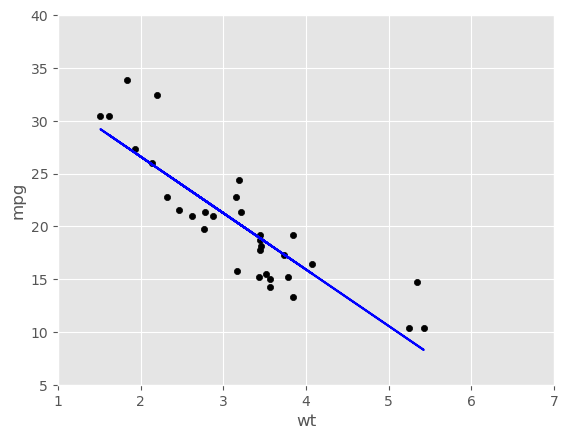

In [19]:
# Plot the new model
mtcars.plot(kind="scatter", x="wt", y="mpg",color="black", xlim=(1,7), ylim=(5,40))
# Plot regression line
plt.plot(mtcars["wt"], train_prediction,color="blue");

In [24]:
error_sm = model_sm.resid
error_sm
print(round(sum(error_sm**2),2))

0    -2.282611
1    -0.919770
2    -2.085952
3     1.297350
4    -0.200144
5    -0.693255
6    -3.905363
7     4.163738
8     2.349959
9     0.299856
10   -1.100144
11    0.866873
12   -0.050247
13   -1.883024
14    1.173350
15    2.103288
16    5.981074
17    6.872711
18    1.746195
19    6.421979
20   -2.611004
21   -2.972586
22   -3.726866
23   -3.462355
24    2.464367
25    0.356426
26    0.152043
27    1.201059
28   -4.543151
29   -2.780940
30   -3.205363
31   -1.027495
dtype: float64

In [23]:
residuals = y - train_prediction
data = pd.DataFrame({'actual_y':y,
       'predicted_y':train_prediction,
       'error1': error_sm,
       'error2':residuals})
print(data)

    actual_y  predicted_y    error1    error2
0       21.0    23.282611 -2.282611 -2.282611
1       21.0    21.919770 -0.919770 -0.919770
2       22.8    24.885952 -2.085952 -2.085952
3       21.4    20.102650  1.297350  1.297350
4       18.7    18.900144 -0.200144 -0.200144
5       18.1    18.793255 -0.693255 -0.693255
6       14.3    18.205363 -3.905363 -3.905363
7       24.4    20.236262  4.163738  4.163738
8       22.8    20.450041  2.349959  2.349959
9       19.2    18.900144  0.299856  0.299856
10      17.8    18.900144 -1.100144 -1.100144
11      16.4    15.533127  0.866873  0.866873
12      17.3    17.350247 -0.050247 -0.050247
13      15.2    17.083024 -1.883024 -1.883024
14      10.4     9.226650  1.173350  1.173350
15      10.4     8.296712  2.103288  2.103288
16      14.7     8.718926  5.981074  5.981074
17      32.4    25.527289  6.872711  6.872711
18      30.4    28.653805  1.746195  1.746195
19      33.9    27.478021  6.421979  6.421979
20      21.5    24.111004 -2.61100

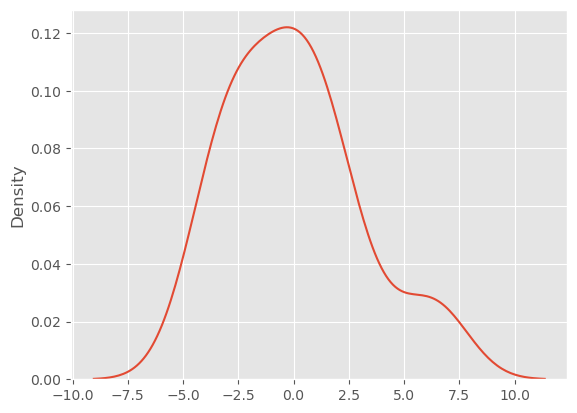

In [25]:
# residual distribution chart
sns.kdeplot(error_sm)
plt.show()

# Polynomial Regression Analysis

In [44]:
# Initialize model
poly_model = linear_model.LinearRegression()
# Make a DataFrame of predictor variables
predictors_X = pd.DataFrame([mtcars["wt"],           
                            mtcars["wt"]**2,
                             mtcars["wt"]**3,
                             mtcars["wt"]**4,
                             mtcars["wt"]**5,
                             mtcars["wt"]**6,                            
                            ]).T     # Include weight squared, .T --> transpose( columnwise to rowise)

# Train the model using the new_cars data
poly_model.fit(X = predictors_X, y = y)
# Check trained model y-intercept
print("Model intercept: ", poly_model.intercept_)
# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients: ", poly_model.coef_)
# Check R-squared
print("Model Accuracy:", poly_model.score(X = predictors_X, y = mtcars["mpg"]))

Model intercept:  -580.1180291199187
Model Coefficients:  [ 1.25251793e+03 -1.01544961e+03  4.19153811e+02 -9.38894251e+01
  1.08661013e+01 -5.09042883e-01]
Model Accuracy: 0.832248246559977


C:\Users\excel\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


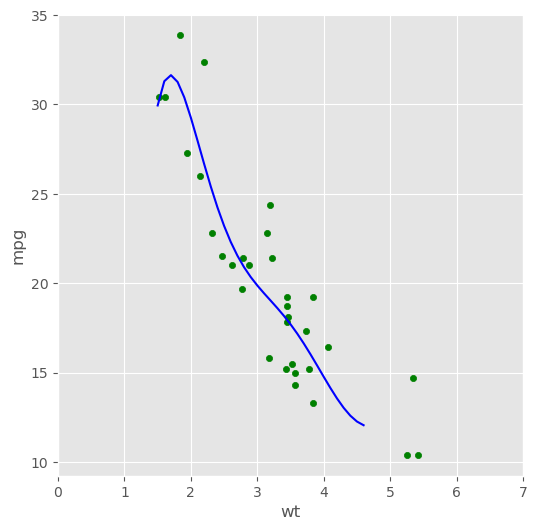

In [47]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 4.7, 0.1)
# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                                poly_line_range**2,
                                poly_line_range**3,
                                poly_line_range**4,
                                poly_line_range**5,
                                poly_line_range**6,
                        ]).T
                               
# print(poly_predictors)
# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",x="wt",y="mpg",figsize=(6,6),color="Green",xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

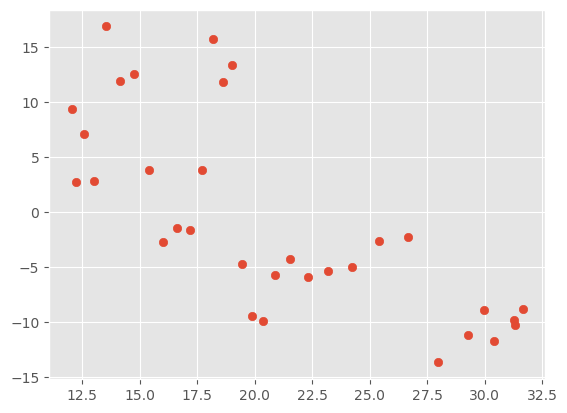

In [48]:
import seaborn as sns
residuals_poly = y - y_values
plt.scatter(y = residuals_poly,x = y_values)
plt.show()

In [74]:
poly_line_range.shape,y.shape

((32,), (32,))